In [35]:
from citipy import citipy
import random
import requests
import json
from latsandlongs import lats, lngs
from api_keys import openweather
import matplotlib.pyplot as plt

In [ ]:
#lats = []
#lngs = []

#I ran this once and saved the results to another file to keep the same results

#for n in range(0, 500):
#    lats.append(random.uniform(-90, 90))
#    lngs.append(random.uniform(-180, 180))

In [8]:
city_list = []
for x, y in zip(lats, lngs):
    city = citipy.nearest_city(x, y)
    country = city.country_code
    city = city.city_name
    tup = (city, country)
    city_list.append(tup)
    
    
    
len(city_list)

city_list 

[('tsihombe', 'mg'),
 ('taolanaro', 'mg'),
 ('burgos', 'es'),
 ('messina', 'za'),
 ('hobart', 'au'),
 ('belushya guba', 'ru'),
 ('maniitsoq', 'gl'),
 ('lasa', 'cn'),
 ('castro', 'cl'),
 ('langham', 'ca'),
 ('barentsburg', 'sj'),
 ('upernavik', 'gl'),
 ('rikitea', 'pf'),
 ('rikitea', 'pf'),
 ('georgetown', 'sh'),
 ('constitucion', 'mx'),
 ('clyde river', 'ca'),
 ('hidalgo', 'mx'),
 ('bluff', 'nz'),
 ('coruripe', 'br'),
 ('vaini', 'to'),
 ('sharjah', 'ae'),
 ('jamestown', 'sh'),
 ('hobart', 'au'),
 ('iskateley', 'ru'),
 ('jamestown', 'sh'),
 ('fortuna', 'us'),
 ('georgetown', 'sh'),
 ('atuona', 'pf'),
 ('cabo san lucas', 'mx'),
 ('tuktoyaktuk', 'ca'),
 ('gat', 'ly'),
 ('thompson', 'ca'),
 ('bluff', 'nz'),
 ('katsuura', 'jp'),
 ('dolores', 'ar'),
 ('cayenne', 'gf'),
 ('almaznyy', 'ru'),
 ('kautokeino', 'no'),
 ('begampur', 'in'),
 ('butaritari', 'ki'),
 ('ushuaia', 'ar'),
 ('tombouctou', 'ml'),
 ('cape town', 'za'),
 ('east london', 'za'),
 ('ushuaia', 'ar'),
 ('vaini', 'to'),
 ('illoqqor

In [24]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#city = "London"
city_name = city_list[2][0]
country_code = city_list[2][1]

print(city_name)
print(country_code)

# Build query URL
#query_url = url + "appid=" + api_key + "&q=" + city

url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}&appid={openweather}&units=imperial"

#url ="api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=b8955f7da2194da93b48f9c32e6ade74"

print(url)

weather_response = requests.get(url)
weather_json = weather_response.json()

weather_json

burgos
es
http://api.openweathermap.org/data/2.5/weather?q=burgos,es&appid=b8955f7da2194da93b48f9c32e6ade74&units=imperial


{'coord': {'lon': -3.7079, 'lat': 42.3394},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 43.92,
  'feels_like': 37.2,
  'temp_min': 43,
  'temp_max': 44.6,
  'pressure': 1018,
  'humidity': 93},
 'visibility': 10000,
 'wind': {'speed': 13.8, 'deg': 220},
 'clouds': {'all': 75},
 'dt': 1620781032,
 'sys': {'type': 1,
  'id': 6396,
  'country': 'ES',
  'sunrise': 1620795395,
  'sunset': 1620847554},
 'timezone': 7200,
 'id': 3127460,
 'name': 'Burgos',
 'cod': 200}

In [26]:
#KeyError
print(weather_json['main']['temp'])
weather_json['coord']['lat']

43.92


42.3394

In [27]:
plot_lats = []
plot_temps = []


for c in city_list:
    city_name = c[0]
    country_code = c[1]
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city_name},{country_code}&appid={openweather}&units=imperial"
    weather_response = requests.get(url)
    weather_json = weather_response.json()

    try:
        plot_lats.append(weather_json['coord']['lat'])
    except KeyError:
        pass
    
    try:
        plot_temps.append(weather_json['main']['temp'])
    except KeyError:
        pass  

In [31]:
#It's a match
print(len(plot_temps))
len(plot_lats)

451


451

In [32]:
#Did not want to run API requests again, so I had the lists stored in another file
from data import plot_temps, plot_lats

In [34]:
#just to prove they imported
#print(plot_temps)
#print(plot_lats)

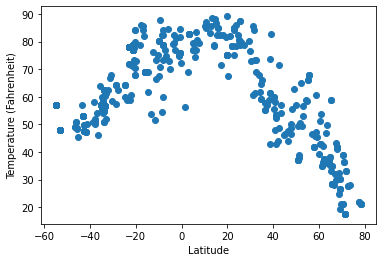

In [45]:
plt.scatter(plot_lats, plot_temps)
plt.xlabel('Latitude')
plt.ylabel('Temperature (Fahrenheit)')
plt.show()